#  Problem Statement

LVB Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Table Of Contents

#### Step 1: Importing the Relevant Libraries

#### Step 2: Data Inspection

#### Step 3: Data Cleaning

#### Step 4: Exploratory Data Analysis

#### Step 5: Building Model

#### Step 6: Building ROC-AOC Curve

### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Step 2: Data Inspection

In [3]:
train = pd.read_csv(r"C:/Users/Sanvi/Desktop/LVB Credit card Prediction/train_s3TEQDk.csv")
test = pd.read_csv(r"C:/Users/Sanvi/Desktop/LVB Credit card Prediction/test_mSzZ8RL.csv")


In [4]:
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [5]:
test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [6]:
train.shape

(245725, 11)

<b>We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.

In [7]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [8]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

<b> We have 12% of missing values in Credit_Product column.

In [9]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [10]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


## Step.3 Data Cleaning

Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [11]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [13]:

train['Is_Lead'].value_counts()


0    187437
1     58288
Name: Is_Lead, dtype: int64

In [14]:
test['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

<b>Since the Credit_Product is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [15]:
#Imputing with Mode
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [16]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(0, 0)

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

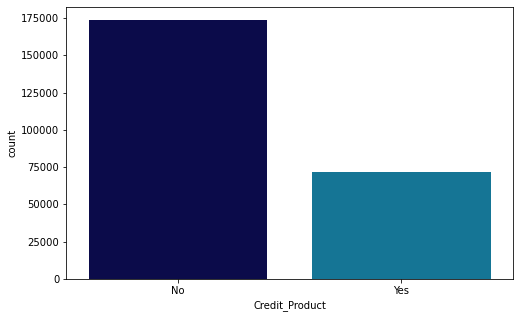

In [17]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train,palette='ocean')

<b>We have succesfully imputed the missing values from the column Credit_product.

## Step 4: Exploratory Data Analysis

In [18]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [19]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<AxesSubplot:xlabel='Is_Active', ylabel='count'>

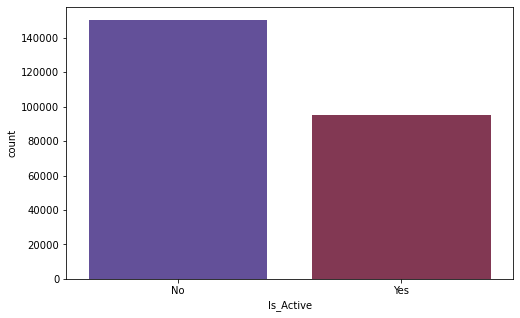

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='twilight')

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

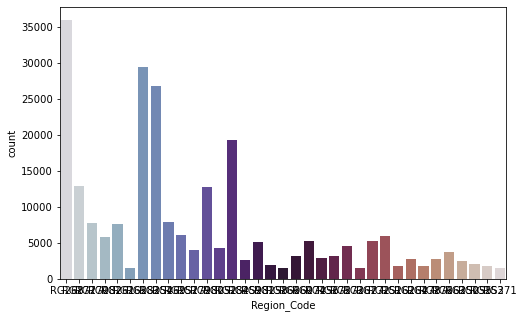

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Region_Code',data=train,palette='twilight')

In [22]:
cor=train.corr()
cor

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


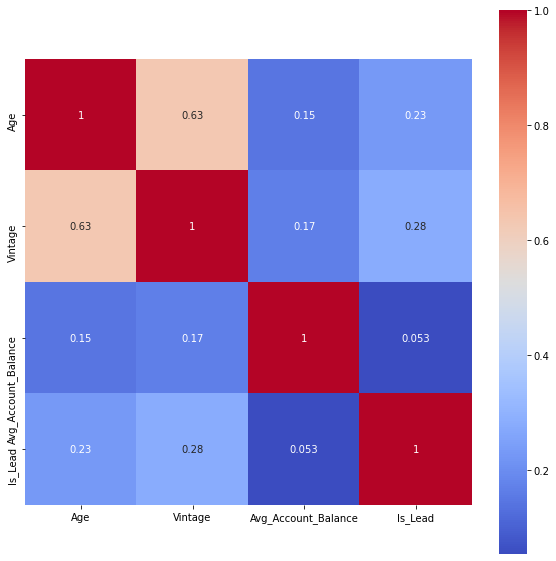

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True, cmap= 'coolwarm', annot= True)
plt.show()

## Step.5 Building Model

In [24]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [25]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
for i in var_mod:
    test[i] = le.fit_transform(test[i])


#### Encoding the required columns from training and test dataset

In [26]:

prediction_var = ['Gender', 'Age', 'Region_Code', 'Occupation','Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']

prediction_var

['Gender',
 'Age',
 'Region_Code',
 'Occupation',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active']

In [27]:
# Seperate Features and Target
X = train[prediction_var]
y= train.Is_Lead

In [28]:
X

,Gender,Age,Region_Code,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,43,0,1045696,0
1,0,30,27,2,32,0,581988,0
2,0,56,18,3,26,0,1484315,1
3,1,34,20,2,19,0,470454,0
4,0,30,32,2,33,0,886787,0
...,...,...,...,...,...,...,...,...
245720,1,51,34,3,109,0,1925586,0
245721,1,27,18,2,15,0,862952,1
245722,0,26,31,2,13,0,670659,0
245723,0,28,23,2,31,0,407504,0


In [29]:
y

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64

In [30]:
# 30% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [31]:
X.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [32]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [33]:
print(scores)

[0.7720669  0.7762585  0.77556668 0.77894437 0.77772352 0.7760866
 0.77156927 0.77038906 0.76998209 0.77633078]


In [34]:
model.fit(X,y)

RandomForestClassifier()

In [ ]:
y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

##### Confusion Matrix

In [ ]:
conf_mat 

##### Accuracy of Model

In [ ]:
print(metrics.accuracy_score(y,y_pred)) # to check the accuracy

In [ ]:
df=pd.DataFrame({"Actual Data:":y,"Predicted Data:":y_pred})
df

#### ROC-AUC Curve

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y,y_pred)
roc_auc=auc(fpr,tpr)
print(thresholds)
print(fpr)
print(tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### MSE And RMSE

In [ ]:
MSE= metrics.mean_squared_error(y,y_pred)
print("Mean Squared Error:",MSE)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

### Final Submission

In [ ]:
submission = pd.read_csv('S:\\Edureka\\Other ML Projects\\New folder\\sample_submission_eyYijxG.csv')
final_predictions = model.predict(test.iloc[:,[1,2,3,4,5,6,7,8,9]])
submission['Is_Lead'] = final_predictions

#submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 1 if x>0 else 0)

submission.to_csv('S:\\Edureka\\Other ML Projects\\New folder\\shivasubmission.csv', index=False)

### First 12272 rows are positive predictions(Probability of Customer showing interest) for the target variable

In [ ]:
df1 = pd.read_csv("S:\\Edureka\\Other ML Projects\\New folder\\shivasubmission.csv")
sorted_df = df1.sort_values(by=["Is_Lead"], ascending=False)
sorted_df.to_csv('S:\\Edureka\\Other ML Projects\\New folder\\Finalsubmission.csv', index=False)